In [1]:

import logging
import logging.handlers
import pprint
import sys
from datetime import datetime  # noqa

from utilities import get_env
from solaredge.api import SolaredgeClient

logger = logging.getLogger()
if (logger.hasHandlers()):
    logger.handlers.clear()
logger.addHandler(logging.StreamHandler(sys.stdout))
logger.setLevel(logging.DEBUG)

env = get_env()
    
client = SolaredgeClient(apikey=env.get('solaredge_apikey'))

Initialising Solaredge API Client
Calling API endpoint: Site List
Issuing HTTP request: https://monitoringapi.solaredge.com/sites/list/?api_key=XFNLCGLDEDLLKKD987ST53LL63SV4YU9&size=100&startIndex=0&sortOrder=ASC&Status=All
Starting new HTTPS connection (1): monitoringapi.solaredge.com:443
https://monitoringapi.solaredge.com:443 "GET /sites/list/?api_key=XFNLCGLDEDLLKKD987ST53LL63SV4YU9&size=100&startIndex=0&sortOrder=ASC&Status=All HTTP/1.1" 200 None
Response received: <Response [200]>
Formatted API results:
 {
  "sites": {
    "count": 1,
    "site": [
      {
        "id": 1756278,
        "name": "27 Stafford Road - Clayton",
        "accountId": 5665,
        "status": "Active",
        "peakPower": 4.68,
        "lastUpdateTime": "2023-12-09",
        "currency": "GBP",
        "installationDate": "2020-08-12",
        "ptoDate": null,
        "notes": "",
        "type": "Optimizers & Inverters",
        "location": {
          "country": "United Kingdom",
          "city": "War

In [2]:
client.set_datetimes(7, 1)
client.set_dates(7, 1)
client.set_time_unit("DAY")

In [3]:
pprint.pprint(client._storeddata)

SummaryData(sites=[Site(id=1756278,
                        name='27 Stafford Road - Clayton',
                        accountId=5665,
                        status=<SiteStatus.ACTIVE: 'Active'>,
                        peakPower=4.68,
                        lastUpdateTime=datetime.date(2023, 12, 9),
                        currency=<Currency.GBP: 'Pounds Sterling'>,
                        installationDate=datetime.date(2020, 8, 12),
                        ptoDate=None,
                        notes='',
                        type='Optimizers & Inverters',
                        location=Location(country='United Kingdom',
                                          city='Warrington ',
                                          address='Stafford Road 27',
                                          address2='',
                                          zip='WA4 6RP',
                                          timeZone='Europe/London',
                                          countryCod

In [4]:
energy = client.get_energy()
power = client.get_power()
powerd = client.get_power_details()

Calling API endpoint: Site Energy
Issuing HTTP request: https://monitoringapi.solaredge.com/site/1756278/energy/?api_key=XFNLCGLDEDLLKKD987ST53LL63SV4YU9&startDate=2023-12-02&endDate=2023-12-08&timeUnit=DAY
https://monitoringapi.solaredge.com:443 "GET /site/1756278/energy/?api_key=XFNLCGLDEDLLKKD987ST53LL63SV4YU9&startDate=2023-12-02&endDate=2023-12-08&timeUnit=DAY HTTP/1.1" 200 None
Response received: <Response [200]>
Formatted API results:
 {
  "energy": {
    "timeUnit": "DAY",
    "unit": "Wh",
    "measuredBy": "INVERTER",
    "values": [
      {
        "date": "2023-12-02 00:00:00",
        "value": 4706.0
      },
      {
        "date": "2023-12-03 00:00:00",
        "value": 434.0
      },
      {
        "date": "2023-12-04 00:00:00",
        "value": 1244.0
      },
      {
        "date": "2023-12-05 00:00:00",
        "value": 1690.0
      },
      {
        "date": "2023-12-06 00:00:00",
        "value": 4593.0
      },
      {
        "date": "2023-12-07 00:00:00",
    

In [5]:
pprint.pprint(powerd)

DetailData(timeUnit=<TimeUnit.QUARTER_OF_AN_HOUR: 'QUARTER_OF_AN_HOUR'>,
           unit='W',
           meters=[DataType(type='Production',
                            values=[Value(date=datetime.datetime(2023, 12, 2, 0, 0),
                                          value=0.0),
                                    Value(date=datetime.datetime(2023, 12, 2, 0, 15),
                                          value=0.0),
                                    Value(date=datetime.datetime(2023, 12, 2, 0, 30),
                                          value=0.0),
                                    Value(date=datetime.datetime(2023, 12, 2, 0, 45),
                                          value=0.0),
                                    Value(date=datetime.datetime(2023, 12, 2, 1, 0),
                                          value=0.0),
                                    Value(date=datetime.datetime(2023, 12, 2, 1, 15),
                                          value=0.0),
                     

In [6]:
for data in energy.values:
    print(data.date.hour, data.date)

0 2023-12-02 00:00:00
0 2023-12-03 00:00:00
0 2023-12-04 00:00:00
0 2023-12-05 00:00:00
0 2023-12-06 00:00:00
0 2023-12-07 00:00:00
0 2023-12-08 00:00:00


In [7]:
telemetry = client.get_inverter_telemetry()
pprint.pprint(telemetry)

Calling API endpoint: Inverter Technical Data
Issuing HTTP request: https://monitoringapi.solaredge.com/equipment/1756278/730299E6-F4/data/?api_key=XFNLCGLDEDLLKKD987ST53LL63SV4YU9&startTime=2023-12-02 00:00:00&endTime=2023-12-08 23:59:59
https://monitoringapi.solaredge.com:443 "GET /equipment/1756278/730299E6-F4/data/?api_key=XFNLCGLDEDLLKKD987ST53LL63SV4YU9&startTime=2023-12-02%2000:00:00&endTime=2023-12-08%2023:59:59 HTTP/1.1" 200 None
Response received: <Response [200]>
Formatted API results:
 {
  "data": {
    "count": 674,
    "telemetries": [
      {
        "date": "2023-12-02 04:01:51",
        "totalActivePower": 0.0,
        "dcVoltage": null,
        "powerLimit": 100.0,
        "totalEnergy": 11855900.0,
        "temperature": 21.0763,
        "inverterMode": "SLEEPING",
        "operationMode": 0,
        "L1Data": {
          "acCurrent": 0.0,
          "acVoltage": 246.756,
          "acFrequency": 49.9378,
          "apparentPower": 0.0,
          "activePower": 0.0,
 

In [8]:
pprint.pprint(telemetry)

[Telemetry(date=datetime.datetime(2023, 12, 2, 4, 1, 51),
           totalActivePower=0.0,
           powerLimit=100.0,
           totalEnergy=11855900.0,
           temperature=21.0763,
           inverterMode=<InverterMode.SLEEPING: 'Night mode'>,
           operationMode=0,
           groundFaultResistance=0,
           vL1To2=0,
           vL2To3=0,
           vL3To1=0,
           dcVoltage=None,
           L1Data=LData(acCurrent=0.0,
                        acVoltage=246.756,
                        acFrequency=49.9378,
                        apparentPower=0.0,
                        activePower=0.0,
                        reactivePower=0.0,
                        cosPhi=0.0),
           L2Data=None,
           L3Data=None),
 Telemetry(date=datetime.datetime(2023, 12, 2, 7, 51, 51),
           totalActivePower=0.0,
           powerLimit=100.0,
           totalEnergy=11855900.0,
           temperature=21.7533,
           inverterMode=<InverterMode.MPPT: 'Production'>,
         

In [9]:
import pandas as pd
from dataclasses import asdict, dataclass


for index , obj in enumerate(power.values):
    power.values[index] = asdict(obj)

dfpower = pd.json_normalize(power.values)


matplotlib data path: /usr/share/matplotlib/mpl-data
CONFIGDIR=/home/nick/.config/matplotlib
interactive is False
platform is linux
loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', '_io', 'marshal', 'posix', '_frozen_importlib_external', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', '_signal', '_abc', 'abc', 'io', '__main__', '_stat', 'stat', '_collections_abc', 'genericpath', 'posixpath', 'os.path', 'os', '_sitebuiltins', 'types', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib', 'importlib._abc', 'itertools', 'keyword', '_operator', 'operator', 'reprlib', '_collections', 'collections', '_functools', 'functools', 'contextlib', 'importlib.util', 'importlib.machinery', 'mpl_toolkits', 'apport_python_hook', 'sitecustomize', 'site', 'runpy', 'enum', '_sre', 'sre_constants', 'sre_parse', 'sre_compile', '_locale', 'copyreg', 're', 'ipykernel._version', '_json'

<AxesSubplot:xlabel='date', ylabel='value'>

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0.
findfont: score(FontEntry(fname='/usr/share/matplotlib/mpl-data/fonts/ttf/cmex10.ttf', name='cmex10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/usr/share/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='/usr/share/matplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/usr/share/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/usr/share/matplotlib/mpl-data/fo

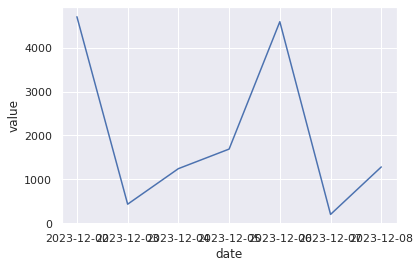

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

logger.setLevel(logging.DEBUG)

for index , obj in enumerate(energy.values):
    energy.values[index] = asdict(obj)
dfenergy = pd.json_normalize(energy.values)
dfp = pd.DataFrame(dfpower)
dfe = pd.DataFrame(dfenergy)

sns.set_theme()

sns.lineplot(x="date", y="value", data=dfe)
#sns.lineplot(x="date", y="value", data=dfp)

print([item.SN for list in [data.inverters for data in client._storeddata.inventories] for item in list])

In [23]:
pprint.pprint(client._storeddata)



SummaryData(sites=[Site(id=1756278,
                        name='27 Stafford Road - Clayton',
                        accountId=5665,
                        status=<SiteStatus.ACTIVE: 'Active'>,
                        peakPower=4.68,
                        lastUpdateTime=datetime.date(2023, 9, 17),
                        currency=<Currency.GBP: 'Pounds Sterling'>,
                        installationDate=datetime.date(2020, 8, 12),
                        ptoDate=None,
                        notes='',
                        type='Optimizers & Inverters',
                        location=Location(country='United Kingdom',
                                          city='Warrington ',
                                          address='Stafford Road 27',
                                          address2='',
                                          zip='WA4 6RP',
                                          timeZone='Europe/London',
                                          countryCod